## DS 2500 – Assignment 2

Aaron Templeton

U0734119 

In [0]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 1000

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
import geopandas

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 11.8MB 14.9MB/s 
     |████████████████████████████████| 10.1MB 50.5MB/s 
     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=ebede4b2d3ffd3b9374c3bb350c90838361aaec7653a1df5ad6bfb678d36863d
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


We will use the WWI Bombing Operations Dataset from THOR.

[Found here on Kaggle](https://www.kaggle.com/usaf/wwi-bombing-operations)

The THOR data contains data for Allied aircraft carrying a combined bomb load of more than a million pounds over 1,437 recorded missions. This Theater History of Operations (THOR) dataset combines digitized paper mission reports from WWI.

THOR is a dataset project initiated by Lt Col Jenns Robertson and continued in partnership with Data.mil, an experimental project, created by the Defense Digital Service in collaboration with the Deputy Chief Management Officer and data owners throughout the U.S. military.

World War 1 Data Fields

1. **Master Index Number**:
Unique identifier number used to internally track the record fields
2. **Classification**:
Security Classification of the material. World War 1 data is Unclassified
3. **Date**:
(MM/DD/YYYY Format) Date the operation took place. In the case of night operations that span more than one day, the value will be the date that the plane took off from the launch base
4. **Operation**:
Name of the operation being supported, if given or known
5. **Country**:
Country to which the attacking aircraft belongs (i.e. USA, UK, Australia, etc.)
6. **Service**:
Department or Service to which the attacking aircraft belongs (USAAF, USN, RAF, RAAF, etc.)
7. **Unit**:
Military unit to which the attacking aircraft belongs – depending on the fidelity of the data, this may be a Numbered Air Force, Command, Wing, Group, or Squadron. The default value is Squadron
8. **MDS**:
Mission Delivery System or airframe used to deliver the weapon to target – text name
9. **Mission#**:
Specific mission number if known. Mission numbers may repeat between various levels of command (i.e. different squadrons, groups, wings, and Numbered Air Forces may each have a similarly numbered Mission #35, but each of those may be different missions), hence mission number is not used as a unique identifier, but provided, when known, to correlate with other data that may reference it.
10. **Departure**:
Day or night mission indicator when lacking more detailed information. Otherwise contains the date time stamp in MM/DD/YYYY HH:MM:SS format on a 24 hour clock. Times are assumed to be local time.
11. **Return**:
Return date time stamp in same format as Departure. Blank if no data available.
12. **Duration**:
Duration of flight calculated by subtracting Departure from Return Date/Time. Format is HH:MM:SS of elapsed mission time.
13. **Number of planes launched**:
Number of aircraft that successfully took off in direct support of the bombing mission. Does not include escort aircraft.
14. **Number of planes cancelled**:
Number of aircraft that did not make it to target for whatever reason.
15. **Number of planes attacking**:
Number of aircraft that actually attacked the target.
16. **Callsign**:
Callsign of aircraft or pilot name. For WW1, the airship name
17. **Number of Weapons expended**: Number of weapons expended.
18. **Weapon type**:
Text description of weapon type
19. **Total Weapon weight in pounds**:
Calculated amount based on “Number of Weapons Expended” and weapon weight indexed by “Weapon Type” on an internal lookup table. Weapon weight is based on the net explosive actually delivered to the target, irrespective of the weight of propellant it took to reach the target. For ammunition, this is the weight of the round, not the weight of the full bullet. Likewise, for a contemporary Hellfire missile, the missile itself weighs 100 pounds, but delivers a 20 pound explosive warhead to the target. The weight used for a Hellfire is 20 pounds.
20. **Bombload per plane**:
Calculated value that divides the total weapon weight by the number of aircraft delivering the weapons load. Used as an internal check to ensure that the nominal bomb load is within the carrying capacity of the aircraft.
21. **TOT**:
Time Over Target. This is a start time in HH:MM:SS format indicating when the bomb drop began. It does not indicate how long the bomb drop took, or the number of passes taken to accomplish the bomb drop.
22. **Latitude**:
Target Latitude in Decimal degrees format (i.e. 30Deg 45 min is 30.75 degrees)
23. **Longitude**:
Target Longitude in Decimal degrees format (i.e. 30Deg 45 min is 30.75 degrees)
24. **Tgt Location**:
Text description of the target location, city name, etc.
25. **Country**:
Text name of target country
26. **Tgt Name Type**:
Text description of target category (Port, Aerodrome, Railyard, etc.)
27. **Altitude in meters**:
Bomb release altitude in meters. Altitude is believed to be height above ground (unsure of how height was determined in 1918). When multiple altitudes are given, the lowest altitude is used
28. **Altitude in feet**:
Bomb release altitude in feet. Altitude is believed to be height above ground (unsure of how height was determined in 1918). When multiple altitudes are given, the lowest altitude is used
29. **Speed in mph**:
Notional speed at altitude for bomb release. Value provided from MDS specs.
30. **TO Base**:
Take off Base place name
31. **TO Base Lat**:
Take off Base Latitude in Decimal Degrees
32. **TO Base Long**:
Take off Base Longitude in Decimal Degrees
33. **Bomb Damage Assessment**:
Text description as provided in daily raid reports
34. **Enemy Action**:
Text description as provided in daily raid reports
35. **Route Details**:
Text description as provided in daily raid reports
36. **ISR Collected**:
Text description as provided in daily raid reports
37. **Friendly Casualties**:
Text description as provided in daily raid reports
38. **Weather Visibility**:
Text description as provided in daily raid reports
39. **Weather Reanalysis valid time**
40. **Altitude (ft.)**
41. **Wind direction (Degrees)**
42. **Wind Speed (Knots)**
43. **Temperature at altitude (Degrees Celsius)**
44. **Relative Humidity at altitude (%)**
45. **Temperature Dew Point Depression**: (T-Td) at Altitude (Degrees C)
46. **Low Cloud Cover (%)**
47. **Mid Cloud Cover (%)**
48. **High Cloud Cover (%)**
49. **K-Index**: Thunderstorm Potential Indicator
50. **TT-Index**: Severe Thunderstorm Potential Indicator
51. **Icing Potential at Altitude**
52. **Moon Illumination (%)**
53. **Wind Direction**: 10 meters above ground (Degrees)
54. **Wind Speed 10 meters**: above ground (Knots)
55. **Surface Temperature (Deg C)**
56. **Precipitation**: past 3 hours (inches)
57. **Percent of ground covered with snow (%)**


In [0]:
!curl -L "https://www.dropbox.com/s/mhhon63a87ol8q9/THOR_WWI_Bombing_Operations.csv?dl=0" > 'ww1.csv'
operations_df = pd.read_csv('ww1.csv',encoding = "ISO-8859-1", parse_dates=['MSNDATE'])
print("There are {0:,} rows of data.".format(len(operations_df)))
operations_df.head(20)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  358k  100  358k    0     0   310k      0  0:00:01  0:00:01 --:--:--  310k
There are 1,441 rows of data.


,WWI_ID,MSNDATE,OPERATION,COUNTRY,SERVICE,UNIT,MDS,MISSIONNUM,TAKEOFFTIME,NUMBEROFPLANESATTACKING,CALLSIGN,WEAPONSEXPENDED,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,BDA,ENEMYACTION,ROUTEDETAILS,ISRCOLLECTED,FRIENDLYCASUALTIES,WEATHER,ALTITUDE
0,1,1917-10-16,NaN,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,NaN,DAY,8,NaN,NaN,NaN,1792.0,224.000000,49.233333,7.000000,SAARBRUCKEN,GERMANY,BURBACH WORKS-BLAST FUM,OCHEY,48.581292,5.953517,NaN,NaN,NaN,NaN,0,NaN,10000.0
1,2,1917-10-20,NaN,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,NaN,DAY,11,NaN,NaN,NaN,2464.0,224.000000,49.266667,6.783333,WADGASSEN & BOUS,GERMANY,FACTORY & RAILWAYS,OCHEY,48.581292,5.953517,NaN,NaN,NaN,NaN,1,NaN,10000.0
2,3,1917-10-23,NaN,UK,RAF,NO. 100 SQDN,FE2B,NaN,NIGHT,12,NaN,NaN,NaN,3335.0,277.916667,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,"RAILWAY JTN, STN.TRAINS",OCHEY,48.581292,5.953517,NaN,NaN,NaN,NaN,2,NaN,10000.0
3,4,1917-10-23,NaN,UK,RAF,NO. 216 SQDN,HADLEY PAGE O/100,NaN,NIGHT,7,NaN,NaN,NaN,9408.0,1344.000000,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,BURBACH WORKS,VILLESENEUX,48.781080,4.163132,NaN,NaN,NaN,NaN,2,NaN,10000.0
4,5,1917-10-28,NaN,UK,RAF,NO. 100 SQDN,FE2B,NaN,NIGHT,3,NaN,NaN,NaN,915.0,305.000000,49.233333,7.000000,SAARBRUCKEN & OTHERS,GERMANY,"RAILWAYS, BRDG,TRAINS",OCHEY,48.581292,5.953517,NaN,NaN,NaN,NaN,0,NaN,10000.0
5,6,1917-10-29,NaN,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,NaN,DAY,12,NaN,NaN,NaN,2712.0,226.000000,49.203716,7.604745,PIRMASENS,GERMANY,BOOT FACTORY,OCHEY,48.581292,5.953517,NaN,NaN,NaN,NaN,0,NaN,10000.0
6,7,1917-10-29,NaN,UK,RAF,NO. 100 SQDN,FE2B,NaN,NIGHT,10,NaN,NaN,NaN,3075.0,307.500000,NaN,NaN,SAAR VALLEY,GERMANY,"FACT, FUM, STEELWRKS, TM",OCHEY,48.581292,5.953517,NaN,NaN,NaN,NaN,0,NaN,9999.0
7,8,1917-10-31,NaN,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,NaN,DAY,6,NaN,NaN,NaN,1362.0,227.000000,49.444700,7.769004,KAISERSLAUTERN,GERMANY,MUNITIONS FACTORY,OCHEY,48.581292,5.953517,NaN,NaN,NaN,NaN,0,NaN,10000.0
8,9,1917-12-04,NaN,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,NaN,DAY,11,NaN,NaN,NaN,2440.0,221.818182,49.233333,7.000000,SAARBRUCKEN & ZWEIBRUCKEN,GERMANY,"FACTORY, TOWN, RAIL STATION",TANTONVILLE,48.470503,6.150884,NaN,NaN,NaN,NaN,0,NaN,10000.0
9,10,1917-12-05,NaN,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,NaN,DAY,11,NaN,NaN,NaN,2406.0,218.727273,49.233333,7.000000,SAARBRUCKEN,GERMANY,BURBACH WORKS,TANTONVILLE,48.470503,6.150884,NaN,NaN,NaN,NaN,0,NaN,10000.0


Which of the columns have missing data? obviously, there a few columns that have nearly completely null values. Such columns will serve no purpose in our analysis. Columns that will be of interest include: MDS, TGTCOUNTRY, COUNTRY, BOMBLOAD

In [0]:
operations_df.isnull().sum().sort_values(ascending=False)/len(operations_df)*100

CALLSIGN                   85.565579
ROUTEDETAILS               81.748786
BDA                        81.124219
ISRCOLLECTED               80.777238
WEATHER                    80.569049
ENEMYACTION                79.875087
MISSIONNUM                 79.736294
OPERATION                  79.736294
WEAPONSEXPENDED            76.544067
WEAPONTYPE                 74.878557
FRIENDLYCASUALTIES         49.063151
UNIT                       44.899375
SERVICE                    41.568355
TAKEOFFLATITUDE            35.045108
TAKEOFFLONGITUDE           35.045108
ALTITUDE                   34.004164
TAKEOFFTIME                31.436502
WEAPONWEIGHT               31.089521
NUMBEROFPLANESATTACKING    20.957668
TGTTYPE                    16.516308
TAKEOFFBASE                16.030534
BOMBLOAD                   13.809854
LATITUDE                    5.482304
LONGITUDE                   5.482304
TGTCOUNTRY                  3.816794
MDS                         3.053435
TGTLOCATION                 2.151284
C

## Drop the data 


The first option is to use Pandas drop() operation. We will use drop to drop several columns that will not be relevant to our analysis simply because they do not have enough data


In [0]:
operations_drop_df = operations_df.drop(columns=['CALLSIGN', 'ROUTEDETAILS', 'BDA', 'ISRCOLLECTED', 'WEATHER','OPERATION','MISSIONNUM'])
operations_drop_df.isnull().sum().sort_values(ascending=False)/len(operations_df)*100

ENEMYACTION                79.875087
WEAPONSEXPENDED            76.544067
WEAPONTYPE                 74.878557
FRIENDLYCASUALTIES         49.063151
UNIT                       44.899375
SERVICE                    41.568355
TAKEOFFLONGITUDE           35.045108
TAKEOFFLATITUDE            35.045108
ALTITUDE                   34.004164
TAKEOFFTIME                31.436502
WEAPONWEIGHT               31.089521
NUMBEROFPLANESATTACKING    20.957668
TGTTYPE                    16.516308
TAKEOFFBASE                16.030534
BOMBLOAD                   13.809854
LATITUDE                    5.482304
LONGITUDE                   5.482304
TGTCOUNTRY                  3.816794
MDS                         3.053435
TGTLOCATION                 2.151284
COUNTRY                     0.208189
MSNDATE                     0.000000
WWI_ID                      0.000000
dtype: float64

In [0]:
operations_drop_df.head(5)

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONSEXPENDED,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,ENEMYACTION,FRIENDLYCASUALTIES,ALTITUDE
0,1,1917-10-16,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,8,NaN,NaN,1792.0,224.000000,49.233333,7.000000,SAARBRUCKEN,GERMANY,BURBACH WORKS-BLAST FUM,OCHEY,48.581292,5.953517,NaN,0,10000.0
1,2,1917-10-20,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,11,NaN,NaN,2464.0,224.000000,49.266667,6.783333,WADGASSEN & BOUS,GERMANY,FACTORY & RAILWAYS,OCHEY,48.581292,5.953517,NaN,1,10000.0
2,3,1917-10-23,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,12,NaN,NaN,3335.0,277.916667,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,"RAILWAY JTN, STN.TRAINS",OCHEY,48.581292,5.953517,NaN,2,10000.0
3,4,1917-10-23,UK,RAF,NO. 216 SQDN,HADLEY PAGE O/100,NIGHT,7,NaN,NaN,9408.0,1344.000000,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,BURBACH WORKS,VILLESENEUX,48.781080,4.163132,NaN,2,10000.0
4,5,1917-10-28,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,3,NaN,NaN,915.0,305.000000,49.233333,7.000000,SAARBRUCKEN & OTHERS,GERMANY,"RAILWAYS, BRDG,TRAINS",OCHEY,48.581292,5.953517,NaN,0,10000.0


Now I will use Pandas dropna() function to remove the observations that have missing data. If there are only a few missing observations, you should still have enough statistical power to make claims about the rest of the data in the sample. We are going to drop observations that have no COUNTRY or TARGET COUNTRY listed


In [0]:
operations_country_drop_df = operations_drop_df.dropna(subset=['COUNTRY', 'TGTCOUNTRY'])
print("There are {0:,} rows of data after dropping, compared to {1:,} before.".format(len(operations_country_drop_df),
                                                                                     len(operations_drop_df)))

There are 1,383 rows of data after dropping, compared to 1,441 before.


What are some examples of biases we have introduced by dropping observations?

by dropping the observations with no country or target country, a small bias has been introduced.

In [0]:
operations_country_drop_df['COUNTRY'].value_counts()/len(operations_country_drop_df)

ITALY     0.336949
UK        0.323210
USA       0.321764
FRANCE    0.015184
RAF       0.002892
Name: COUNTRY, dtype: float64

In [0]:
operations_drop_df['COUNTRY'].value_counts()/len(operations_drop_df)

ITALY     0.351839
USA       0.316447
UK        0.312283
FRANCE    0.014573
RAF       0.002776
Name: COUNTRY, dtype: float64

Dropping the missing values of COUNTRY also made small changes to the Target Country. Extremely small change in this case

In [0]:
operations_country_drop_df['TGTCOUNTRY'].value_counts()/len(operations_country_drop_df)

FRANCE         0.444685
ITALY          0.374548
GERMANY        0.112075
SLOVENIA       0.051338
AUSTRIA        0.005785
SWITZERLAND    0.005061
LUXEMBOURG     0.004338
BELGIUM        0.001446
CROATIA        0.000723
Name: TGTCOUNTRY, dtype: float64

In [0]:
operations_drop_df['TGTCOUNTRY'].value_counts()/len(operations_drop_df)

FRANCE         0.426787
ITALY          0.360167
GERMANY        0.107564
SLOVENIA       0.049271
AUSTRIA        0.006940
SWITZERLAND    0.004858
LUXEMBOURG     0.004164
BELGIUM        0.001388
CROATIA        0.000694
Name: TGTCOUNTRY, dtype: float64

The Country column has duplicate names for the United Kingdom. It is represented as UK and RAF (Royal Air Force). We will change RAF to UK to make our data more consistent and avoid have two names for the same Country

In [0]:
operations_country_drop_df['COUNTRY'].value_counts()

ITALY     466
UK        447
USA       445
FRANCE     21
RAF         4
Name: COUNTRY, dtype: int64

In [0]:
operations_uk_raf_df = operations_country_drop_df.copy()
operations_uk_raf_df.loc[operations_uk_raf_df['COUNTRY'] == "RAF", 'COUNTRY'] = "UK"
operations_uk_raf_df['COUNTRY'].value_counts()

ITALY     466
UK        451
USA       445
FRANCE     21
Name: COUNTRY, dtype: int64

In [0]:
operations_uk_raf_df.isnull().sum().sort_values(ascending=False)

ENEMYACTION                1096
WEAPONSEXPENDED            1047
WEAPONTYPE                 1025
FRIENDLYCASUALTIES          653
UNIT                        593
SERVICE                     546
TAKEOFFLONGITUDE            474
TAKEOFFLATITUDE             474
ALTITUDE                    446
TAKEOFFTIME                 410
WEAPONWEIGHT                410
NUMBEROFPLANESATTACKING     271
TGTTYPE                     232
TAKEOFFBASE                 210
BOMBLOAD                    178
LATITUDE                     74
LONGITUDE                    74
MDS                          41
TGTLOCATION                  25
TGTCOUNTRY                    0
COUNTRY                       0
MSNDATE                       0
WWI_ID                        0
dtype: int64

## Encode NAs with a consistent null value

The way `pandas` represents null values are as numpy NANs, which are floats. If the other data in the column are not floats, but are strings, integers, or booleans, then this could create headaches downstream in your data analysis.

We will use `pandas`'s [`.fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) method to replace the NAs with an alternative value, ideally one that is consistent with the other values.

Let's replace the NAN values with consistent values in the dataframe. For our string values we will put "Unknown" and integer values will be 0 or -1

In [0]:
operations_uk_raf_df['TGTLOCATION'].fillna(value="Unknown", inplace=True)
operations_uk_raf_df['MDS'].fillna('Unknown', inplace=True)
operations_uk_raf_df['FRIENDLYCASUALTIES'].fillna(0, inplace=True)
operations_uk_raf_df.isnull().sum().sort_values(ascending=False)

ENEMYACTION                1096
WEAPONSEXPENDED            1047
WEAPONTYPE                 1025
UNIT                        593
SERVICE                     546
TAKEOFFLONGITUDE            474
TAKEOFFLATITUDE             474
ALTITUDE                    446
TAKEOFFTIME                 410
WEAPONWEIGHT                410
NUMBEROFPLANESATTACKING     271
TGTTYPE                     232
TAKEOFFBASE                 210
BOMBLOAD                    178
LATITUDE                     74
LONGITUDE                    74
FRIENDLYCASUALTIES            0
MDS                           0
TGTLOCATION                   0
TGTCOUNTRY                    0
COUNTRY                       0
MSNDATE                       0
WWI_ID                        0
dtype: int64

## Fill the NAs with the mean/median value

The latitudes and longitudes are values that we want to be more careful with. Zero latitude and longitude is an actual position on the globe far from where WWI was taking place. To fill the latitudes and longitudes, we will take the median latitudes and longitudes for the country and place the median values there. 

In [0]:
operations_uk_raf_df.groupby('TGTCOUNTRY', as_index=False)['LONGITUDE', 'LATITUDE'].median()

,TGTCOUNTRY,LONGITUDE,LATITUDE
0,AUSTRIA,10.944074,47.924173
1,BELGIUM,5.023371,50.521425
2,CROATIA,13.833300,44.866700
3,FRANCE,5.869652,49.159167
4,GERMANY,7.769004,49.233333
5,ITALY,12.533815,45.891565
6,LUXEMBOURG,6.166660,49.750000
7,SLOVENIA,13.745310,46.040545
8,SWITZERLAND,4.726096,49.762085


Once we have the median values, we will make new columns on our dataframe for the median longitude and median latitude and then impute those values for the specific target country where the values are NAN

In [0]:
operations_uk_raf_df['M_LONGITUDE'] = operations_uk_raf_df.groupby('TGTCOUNTRY', as_index=False)['LONGITUDE'].transform('median')
operations_uk_raf_df['M_LATITUDE'] = operations_uk_raf_df.groupby('TGTCOUNTRY', as_index=False)['LATITUDE'].transform('median')
operations_uk_raf_df['LONGITUDE'].fillna(operations_uk_raf_df.M_LONGITUDE, inplace=True)
operations_uk_raf_df['LATITUDE'].fillna(operations_uk_raf_df.M_LATITUDE, inplace=True)
operations_uk_raf_df.isnull().sum().sort_values(ascending=False)

ENEMYACTION                1096
WEAPONSEXPENDED            1047
WEAPONTYPE                 1025
UNIT                        593
SERVICE                     546
TAKEOFFLONGITUDE            474
TAKEOFFLATITUDE             474
ALTITUDE                    446
WEAPONWEIGHT                410
TAKEOFFTIME                 410
NUMBEROFPLANESATTACKING     271
TGTTYPE                     232
TAKEOFFBASE                 210
BOMBLOAD                    178
M_LATITUDE                    0
MDS                           0
MSNDATE                       0
COUNTRY                       0
LATITUDE                      0
M_LONGITUDE                   0
LONGITUDE                     0
TGTLOCATION                   0
TGTCOUNTRY                    0
FRIENDLYCASUALTIES            0
WWI_ID                        0
dtype: int64

All of our NAN values for longitude and latitude have been filled and we now have new columns for the median longitude and latitude

In [0]:
operations_uk_raf_df.head(5)

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONSEXPENDED,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,ENEMYACTION,FRIENDLYCASUALTIES,ALTITUDE,M_LONGITUDE,M_LATITUDE
0,1,1917-10-16,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,8,NaN,NaN,1792.0,224.000000,49.233333,7.000000,SAARBRUCKEN,GERMANY,BURBACH WORKS-BLAST FUM,OCHEY,48.581292,5.953517,NaN,0,10000.0,7.769004,49.233333
1,2,1917-10-20,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,11,NaN,NaN,2464.0,224.000000,49.266667,6.783333,WADGASSEN & BOUS,GERMANY,FACTORY & RAILWAYS,OCHEY,48.581292,5.953517,NaN,1,10000.0,7.769004,49.233333
2,3,1917-10-23,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,12,NaN,NaN,3335.0,277.916667,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,"RAILWAY JTN, STN.TRAINS",OCHEY,48.581292,5.953517,NaN,2,10000.0,7.769004,49.233333
3,4,1917-10-23,UK,RAF,NO. 216 SQDN,HADLEY PAGE O/100,NIGHT,7,NaN,NaN,9408.0,1344.000000,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,BURBACH WORKS,VILLESENEUX,48.781080,4.163132,NaN,2,10000.0,7.769004,49.233333
4,5,1917-10-28,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,3,NaN,NaN,915.0,305.000000,49.233333,7.000000,SAARBRUCKEN & OTHERS,GERMANY,"RAILWAYS, BRDG,TRAINS",OCHEY,48.581292,5.953517,NaN,0,10000.0,7.769004,49.233333


We will do the same operations for the the Takeoff latitude and takeoff longitutde

In [0]:
operations_uk_raf_df.groupby('COUNTRY', as_index=False)['TAKEOFFLONGITUDE', 'TAKEOFFLATITUDE'].median()

,COUNTRY,TAKEOFFLONGITUDE,TAKEOFFLATITUDE
0,FRANCE,4.001944,48.905278
1,ITALY,12.596472,46.031889
2,UK,6.242076,48.581292
3,USA,5.248075,48.673818


In [0]:
operations_uk_raf_df['M_TLONGITUDE'] = operations_uk_raf_df.groupby('COUNTRY', as_index=False)['TAKEOFFLONGITUDE'].transform('median')
operations_uk_raf_df['M_TLATITUDE'] = operations_uk_raf_df.groupby('COUNTRY', as_index=False)['TAKEOFFLATITUDE'].transform('median')
operations_uk_raf_df['TAKEOFFLONGITUDE'].fillna(operations_uk_raf_df.M_LONGITUDE, inplace=True)
operations_uk_raf_df['TAKEOFFLATITUDE'].fillna(operations_uk_raf_df.M_LATITUDE, inplace=True)
operations_uk_raf_df.isnull().sum().sort_values(ascending=False)

ENEMYACTION                1096
WEAPONSEXPENDED            1047
WEAPONTYPE                 1025
UNIT                        593
SERVICE                     546
ALTITUDE                    446
WEAPONWEIGHT                410
TAKEOFFTIME                 410
NUMBEROFPLANESATTACKING     271
TGTTYPE                     232
TAKEOFFBASE                 210
BOMBLOAD                    178
M_TLATITUDE                   0
MSNDATE                       0
COUNTRY                       0
MDS                           0
LONGITUDE                     0
LATITUDE                      0
M_TLONGITUDE                  0
TGTLOCATION                   0
TGTCOUNTRY                    0
TAKEOFFLATITUDE               0
TAKEOFFLONGITUDE              0
FRIENDLYCASUALTIES            0
M_LONGITUDE                   0
M_LATITUDE                    0
WWI_ID                        0
dtype: int64

## Impute the missing data

with some of are missing values we need to be a little bit more careful. Bombload has a few missing rows, however, we cannot just fill the missing values with zero. 

Bombload per plane: Calculated value that divides the total weapon weight by the number of aircraft delivering the weapons load. Used as an internal check to ensure that the nominal bomb load is within the carrying capacity of the aircraft.

before we impute the bombload and calculate. we will need to impute the number of planes attacking.

In [0]:
operations_uk_raf_df.loc[operations_uk_raf_df.NUMBEROFPLANESATTACKING == '4 SQDNS', 'NUMBEROFPLANESATTACKING'] = 4
operations_uk_raf_df['NUMBEROFPLANESATTACKING'].fillna(0, inplace=True)
operations_uk_raf_df['NUMBEROFPLANESATTACKING'] = operations_uk_raf_df['NUMBEROFPLANESATTACKING'].astype(int)
operations_uk_raf_df['AVGPLANES'] = operations_uk_raf_df.groupby("MDS", as_index=False)['NUMBEROFPLANESATTACKING'].transform('median')
operations_uk_raf_df['NUMBEROFPLANESATTACKING'].replace(0, operations_uk_raf_df.AVGPLANES, inplace=True)
operations_uk_raf_df.isnull().sum().sort_values(ascending=False)

ENEMYACTION                1096
WEAPONSEXPENDED            1047
WEAPONTYPE                 1025
UNIT                        593
SERVICE                     546
ALTITUDE                    446
TAKEOFFTIME                 410
WEAPONWEIGHT                410
TGTTYPE                     232
TAKEOFFBASE                 210
BOMBLOAD                    178
AVGPLANES                     0
MSNDATE                       0
COUNTRY                       0
MDS                           0
NUMBEROFPLANESATTACKING       0
LONGITUDE                     0
LATITUDE                      0
M_TLATITUDE                   0
TGTLOCATION                   0
TGTCOUNTRY                    0
TAKEOFFLATITUDE               0
TAKEOFFLONGITUDE              0
FRIENDLYCASUALTIES            0
M_LONGITUDE                   0
M_LATITUDE                    0
M_TLONGITUDE                  0
WWI_ID                        0
dtype: int64

Now that the Number of planes attacking has been filled with the median, we can impute the values for weapon weight

In [0]:
operations_uk_raf_df['M_BOMB'] = operations_uk_raf_df.groupby(["MDS", "NUMBEROFPLANESATTACKING"])['BOMBLOAD'].transform('median')
operations_uk_raf_df['BOMBLOAD'].fillna(operations_uk_raf_df.M_BOMB, inplace=True)
operations_uk_raf_df.isnull().sum().sort_values(ascending=False)

ENEMYACTION                1096
WEAPONSEXPENDED            1047
WEAPONTYPE                 1025
UNIT                        593
SERVICE                     546
ALTITUDE                    446
TAKEOFFTIME                 410
WEAPONWEIGHT                410
TGTTYPE                     232
TAKEOFFBASE                 210
M_BOMB                       36
BOMBLOAD                     36
MSNDATE                       0
COUNTRY                       0
MDS                           0
NUMBEROFPLANESATTACKING       0
TGTLOCATION                   0
LATITUDE                      0
LONGITUDE                     0
AVGPLANES                     0
TGTCOUNTRY                    0
TAKEOFFLATITUDE               0
TAKEOFFLONGITUDE              0
FRIENDLYCASUALTIES            0
M_LONGITUDE                   0
M_LATITUDE                    0
M_TLONGITUDE                  0
M_TLATITUDE                   0
WWI_ID                        0
dtype: int64

Finally we will remove other columns that won't be necessary and fill NaNs on other columns for further analysis

In [0]:
df = operations_uk_raf_df.drop(columns=['ENEMYACTION', 'ALTITUDE', 'WEAPONSEXPENDED'])
df['UNIT'].fillna('Unknown', inplace=True)
df['SERVICE'].fillna('Unknown', inplace=True)
df['WEAPONTYPE'].fillna('Unknown', inplace=True)
df.head(5)

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,FRIENDLYCASUALTIES,M_LONGITUDE,M_LATITUDE,M_TLONGITUDE,M_TLATITUDE,AVGPLANES,M_BOMB
0,1,1917-10-16,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,8.0,Unknown,1792.0,224.000000,49.233333,7.000000,SAARBRUCKEN,GERMANY,BURBACH WORKS-BLAST FUM,OCHEY,48.581292,5.953517,0,7.769004,49.233333,6.242076,48.581292,10.0,237.500000
1,2,1917-10-20,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,11.0,Unknown,2464.0,224.000000,49.266667,6.783333,WADGASSEN & BOUS,GERMANY,FACTORY & RAILWAYS,OCHEY,48.581292,5.953517,1,7.769004,49.233333,6.242076,48.581292,10.0,224.000000
2,3,1917-10-23,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,12.0,Unknown,3335.0,277.916667,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,"RAILWAY JTN, STN.TRAINS",OCHEY,48.581292,5.953517,2,7.769004,49.233333,6.242076,48.581292,9.0,285.333333
3,4,1917-10-23,UK,RAF,NO. 216 SQDN,HADLEY PAGE O/100,NIGHT,7.0,Unknown,9408.0,1344.000000,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,BURBACH WORKS,VILLESENEUX,48.781080,4.163132,2,7.769004,49.233333,6.242076,48.581292,3.5,1312.000000
4,5,1917-10-28,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,3.0,Unknown,915.0,305.000000,49.233333,7.000000,SAARBRUCKEN & OTHERS,GERMANY,"RAILWAYS, BRDG,TRAINS",OCHEY,48.581292,5.953517,0,7.769004,49.233333,6.242076,48.581292,9.0,312.833333


#**Exploratory Data Analysis**

#1. Formulate your question

What place had the highest number of planes and bombs attack during WWI by allied forces? Is there a significant correlation between the number of attacking planes and the bombload?

We will use the WWI Bombing Operations Dataset from THOR.

Found here on Kaggle

The THOR data contains data for Allied aircraft carrying a combined bomb load of more than a million pounds over 1,437 recorded missions. This Theater History of Operations (THOR) dataset combines digitized paper mission reports from WWI.

THOR is a dataset project initiated by Lt Col Jenns Robertson and continued in partnership with Data.mil, an experimental project, created by the Defense Digital Service in collaboration with the Deputy Chief Management Officer and data owners throughout the U.S. military.

#Check the packaging

In [0]:
df.shape

(1383, 26)

In [0]:
operations_df.shape

(1441, 30)

before cleaning the data there was 1441 rows and 30 columns
after cleaning there is 1383 rows and 26 columns

#Look at the top and bottom of data

In [0]:
df.head(5)

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,FRIENDLYCASUALTIES,M_LONGITUDE,M_LATITUDE,M_TLONGITUDE,M_TLATITUDE,AVGPLANES,M_BOMB
0,1,1917-10-16,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,8.0,Unknown,1792.0,224.000000,49.233333,7.000000,SAARBRUCKEN,GERMANY,BURBACH WORKS-BLAST FUM,OCHEY,48.581292,5.953517,0,7.769004,49.233333,6.242076,48.581292,10.0,237.500000
1,2,1917-10-20,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,11.0,Unknown,2464.0,224.000000,49.266667,6.783333,WADGASSEN & BOUS,GERMANY,FACTORY & RAILWAYS,OCHEY,48.581292,5.953517,1,7.769004,49.233333,6.242076,48.581292,10.0,224.000000
2,3,1917-10-23,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,12.0,Unknown,3335.0,277.916667,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,"RAILWAY JTN, STN.TRAINS",OCHEY,48.581292,5.953517,2,7.769004,49.233333,6.242076,48.581292,9.0,285.333333
3,4,1917-10-23,UK,RAF,NO. 216 SQDN,HADLEY PAGE O/100,NIGHT,7.0,Unknown,9408.0,1344.000000,49.233333,7.000000,"SAARBRUCKEN, ETC",GERMANY,BURBACH WORKS,VILLESENEUX,48.781080,4.163132,2,7.769004,49.233333,6.242076,48.581292,3.5,1312.000000
4,5,1917-10-28,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,3.0,Unknown,915.0,305.000000,49.233333,7.000000,SAARBRUCKEN & OTHERS,GERMANY,"RAILWAYS, BRDG,TRAINS",OCHEY,48.581292,5.953517,0,7.769004,49.233333,6.242076,48.581292,9.0,312.833333


In [0]:
df.tail(5)

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,FRIENDLYCASUALTIES,M_LONGITUDE,M_LATITUDE,M_TLONGITUDE,M_TLATITUDE,AVGPLANES,M_BOMB
1436,1437,1916-05-02,ITALY,ARMY,Unknown,AIRSHIP,NIGHT,1.0,Unknown,NaN,2200.0,45.895556,13.607500,RUBBIA AND MERNA,SLOVENIA,"ENCAMPMENT, TRENCHES AND BATTERY",BOSCOMANTICO,45.472000,10.927900,0,13.745310,46.040545,12.596472,46.031889,1.0,2200.0
1437,1438,1918-11-01,USA,Unknown,Unknown,CAPRONI CA.32,NaN,1.0,Unknown,780.0,780.0,45.783458,12.994871,LATISANO,ITALY,NaN,PADUA / ST. PELAGIUS,45.891565,12.533815,0,12.533815,45.891565,5.248075,48.673818,0.0,780.0
1438,1439,1916-04-04,ITALY,ARMY,Unknown,AIRSHIP,NIGHT,1.0,Unknown,NaN,2200.0,45.747068,13.674956,NABRESINA,ITALY,RAIL CENTER,BOSCOMANTICO,45.472000,10.927900,0,12.533815,45.891565,12.596472,46.031889,1.0,2200.0
1439,1440,1916-06-24,ITALY,Unknown,Unknown,AIRSHIP,NIGHT,1.0,Unknown,NaN,2200.0,45.490800,13.508100,PUNTA SALVORE,ITALY,TOWN?,BOSCOMANTICO,45.472000,10.927900,0,12.533815,45.891565,12.596472,46.031889,1.0,2200.0
1440,1441,1918-11-02,USA,Unknown,Unknown,CAPRONI CA.32,NaN,1.0,Unknown,780.0,780.0,45.906389,13.311944,PALMANOVA,ITALY,STATION,PADUA / ST. PELAGIUS,45.891565,12.533815,0,12.533815,45.891565,5.248075,48.673818,0.0,780.0


#Check the N's
check the numbers after cleaning the data

There should be about 1383 bombing operations after cleaning the data

In [0]:
df['WWI_ID'].count()

1383

all of the dates of the operations should occur during WWI
Jul 28, 1914 – Nov 11, 1918

In [0]:
mdate = df['MSNDATE']
start = '07/28/1914'
end = '11/11/1918'
mask = (mdate >= start) & (mdate <= end)
if mask.count() == df['MSNDATE'].count():
  print("All are during WWI")
else:
  print("Some dates are not during WWI")

All are during WWI


All of the bombing operations should have been performed by allied forces of WWI

The Allies included Britain, France, Russia, Italy and the United States.

In [0]:
df['COUNTRY'].value_counts()

ITALY     466
UK        451
USA       445
FRANCE     21
Name: COUNTRY, dtype: int64

Total Bombload calculated after cleaning data

In [0]:
df['BOMBLOAD'].sum()

1081522.022446905

Types of aircrafts used by allied forces

In [0]:
df['MDS'].value_counts()

CAPRONI CA.32                           381
AIRSHIP                                 198
BREGUET 14 B2                           185
HADLEY PAGE O/400                       108
AIRCO DH9 DAY BOMBER                    104
AIRCO DH4 DAY BOMBER                     98
LIBERTY DH 4                             75
FE2B                                     67
HADLEY PAGE O/100                        46
Unknown                                  41
SPAD XIII                                30
AIRCO DH9A DAY BOMBER                    24
CAPRONI                                  16
SEAPLANES                                 4
CAPRONI CA.32/ FARMANN                    3
CAPRONI CA.32 & BRITISH BOMBER SQDNS      2
VOISIN 8                                  1
Name: MDS, dtype: int64

#Validate against external data source

 On 22 September 1914, Royal Navy bombers struck the Zeppelin bases in Cologne and Dusseldorf in the first Allied strategic bombing mission of the war. 

 let's make sure we have these missions recorded in our dataset

 it appears that this mission is not included in the dataset

In [0]:
df.loc[df['MSNDATE'] == '1914-09-22']

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,FRIENDLYCASUALTIES,M_LONGITUDE,M_LATITUDE,M_TLONGITUDE,M_TLATITUDE,AVGPLANES,M_BOMB


On 19 July 1918, the first aircraft carrier-based air raid in history, the Tondern raid, was launched against the German Zeppelin base at Tondern.

In [0]:
df.loc[df['MSNDATE'] == '1918-07-19']

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,FRIENDLYCASUALTIES,M_LONGITUDE,M_LATITUDE,M_TLONGITUDE,M_TLATITUDE,AVGPLANES,M_BOMB
200,201,1918-07-19,UK,RAF,NO. 55 SQDN,AIRCO DH4 DAY BOMBER,DAY,8.0,Unknown,1916.0,239.500000,48.033333,12.083333,OBERNDORF,GERMANY,MUNITION WORKS,AZELOT,48.594152,6.242076,0,7.769004,49.233333,6.242076,48.581292,10.0,237.500000
201,202,1918-07-19,UK,RAF,NO. 100 SQDN,FE2B,NIGHT,14.0,Unknown,4868.0,347.714286,48.152448,2.202988,"BOULAY, FREISDORF, SAAR",FRANCE,"AERODROMES, RAIL",OCHEY,48.581292,5.953517,0,5.869652,49.159167,6.242076,48.581292,9.0,311.321429
202,203,1918-07-19,UK,RAF,NO. 216 SQDN,HADLEY PAGE O/100,NIGHT,5.0,Unknown,6720.0,1344.000000,49.488333,8.464722,MANNHEIM & SAARBRUCKEN,GERMANY,"BASF, LANZ, GB, BURBACH WRK",OCHEY,48.581292,5.953517,1,7.769004,49.233333,6.242076,48.581292,3.5,1344.000000


planes used by the UK included De Havilland DH9s and Handley Page O/400s, and Handley Page V/1500 bomber

In [0]:
df_UK = df.loc[df['COUNTRY'] == 'UK']
df_UK['MDS'].value_counts()

HADLEY PAGE O/400        108
AIRCO DH9 DAY BOMBER     104
AIRCO DH4 DAY BOMBER      98
FE2B                      67
HADLEY PAGE O/100         46
AIRCO DH9A DAY BOMBER     24
Unknown                    4
Name: MDS, dtype: int64

there were a total of 54 types of WWI bombers

some of the allied bombers include:

Italy : Caproni

French: Breguet

UK: Airco 

USA: Martin MB-1

In [0]:
df['MDS'].value_counts()

CAPRONI CA.32                           381
AIRSHIP                                 198
BREGUET 14 B2                           185
HADLEY PAGE O/400                       108
AIRCO DH9 DAY BOMBER                    104
AIRCO DH4 DAY BOMBER                     98
LIBERTY DH 4                             75
FE2B                                     67
HADLEY PAGE O/100                        46
Unknown                                  41
SPAD XIII                                30
AIRCO DH9A DAY BOMBER                    24
CAPRONI                                  16
SEAPLANES                                 4
CAPRONI CA.32/ FARMANN                    3
CAPRONI CA.32 & BRITISH BOMBER SQDNS      2
VOISIN 8                                  1
Name: MDS, dtype: int64

On 4 December 1914 French pilots carried out the first Entente bombing of a city when they dropped bombs on Freiburg im Breisgau.

In [0]:
df.loc[df['MSNDATE'] == '1914-12-04']

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,FRIENDLYCASUALTIES,M_LONGITUDE,M_LATITUDE,M_TLONGITUDE,M_TLATITUDE,AVGPLANES,M_BOMB


It seems that we do not have any missions during the year of 1914, and based on our validation against external sources, several key allied bombing operations occuring during 1914. The data is incomplete

In [0]:
df.loc[df['MSNDATE'] < '1915-01-01']

,WWI_ID,MSNDATE,COUNTRY,SERVICE,UNIT,MDS,TAKEOFFTIME,NUMBEROFPLANESATTACKING,WEAPONTYPE,WEAPONWEIGHT,BOMBLOAD,LATITUDE,LONGITUDE,TGTLOCATION,TGTCOUNTRY,TGTTYPE,TAKEOFFBASE,TAKEOFFLATITUDE,TAKEOFFLONGITUDE,FRIENDLYCASUALTIES,M_LONGITUDE,M_LATITUDE,M_TLONGITUDE,M_TLATITUDE,AVGPLANES,M_BOMB


#Make a plot

Text(0.5, 1.0, 'Bombing Operations By Country')

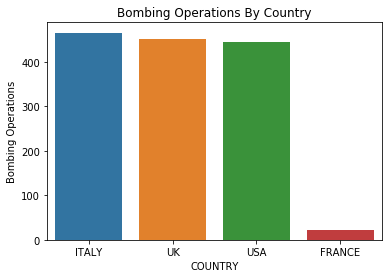

In [0]:
ax = sb.barplot(x=df.COUNTRY.value_counts().index, y=df.COUNTRY.value_counts())
ax.set(xlabel='COUNTRY', ylabel='Bombing Operations')
ax.set_title("Bombing Operations By Country")

Text(0.5, 1.0, 'Bombloads per Country')

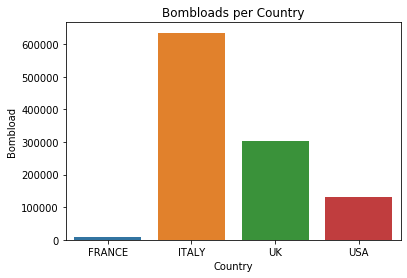

In [0]:
b = df.groupby(by='COUNTRY')['BOMBLOAD']
ax = sb.barplot(x=b.sum().index, y=b.sum())
ax.set(xlabel='Country', ylabel='Bombload')
ax.set_title('Bombloads per Country')

Text(0.5, 1, 'Locations of Bombings in Europe')

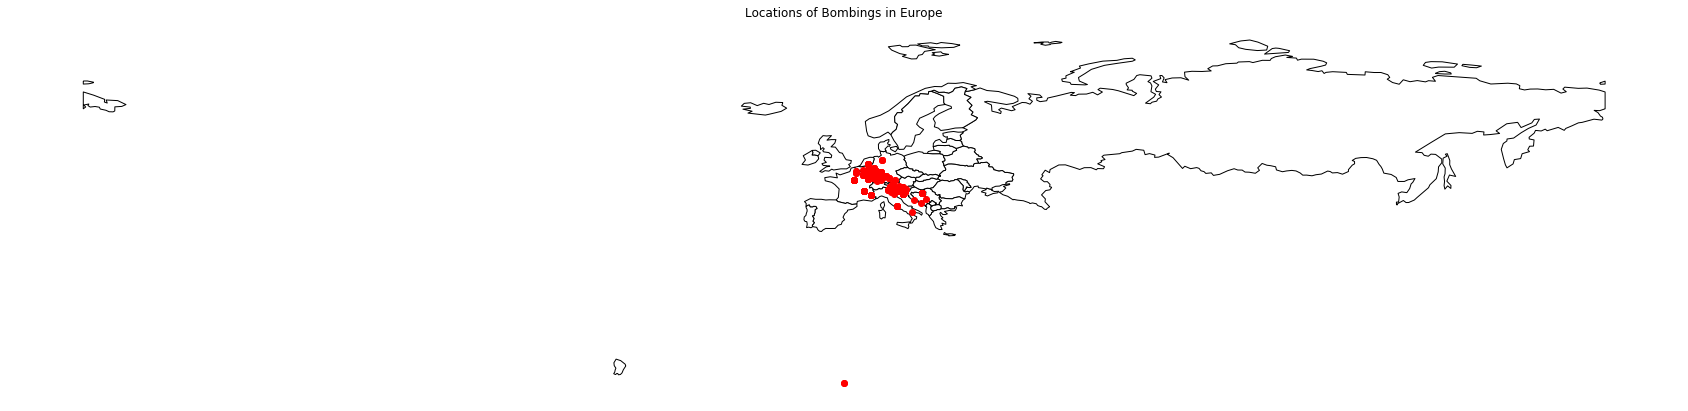

In [0]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.LONGITUDE, df.LATITUDE))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black', figsize=(30,30))
ax.axis('off')
gdf.plot(ax=ax, color='red')

ax.set_title("Locations of Bombings in Europe")


Text(0.5, 1.0, 'Bombing Operations on Country')

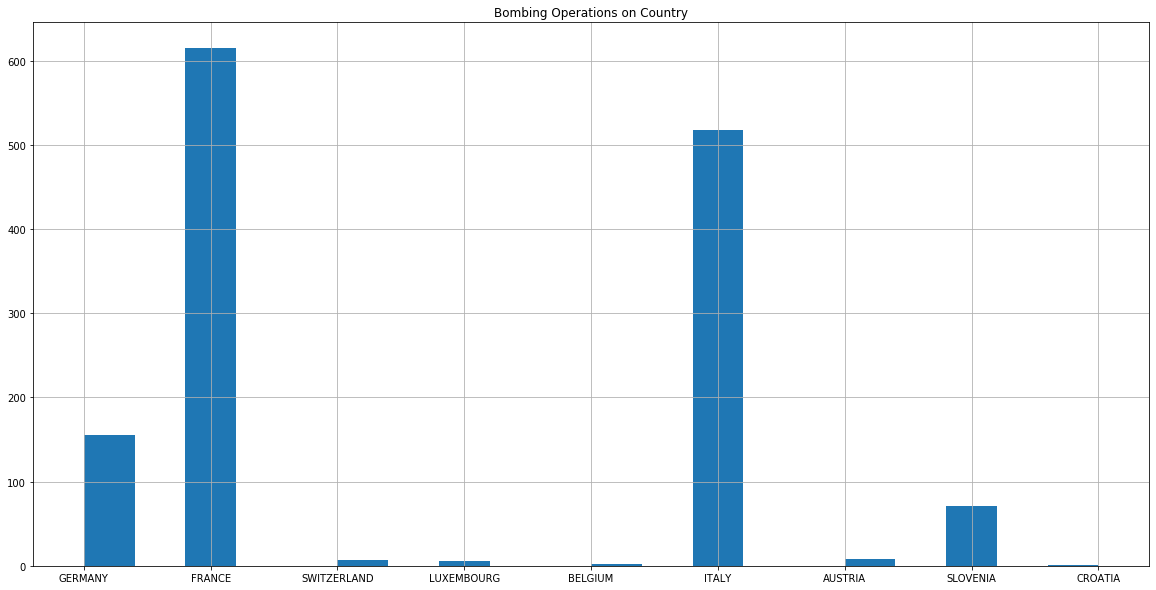

In [0]:
plt.figure(figsize=(20,10))
df['TGTCOUNTRY'].hist(bins=20)
plt.title("Bombing Operations on Country")

#Try an easy solution and statistical test

What place had the highest number of planes and bombs attack during WWI by allied forces? Is there a significant correlation between the number of attacking planes and the bombload?

In [0]:
df.groupby('TGTCOUNTRY')['NUMBEROFPLANESATTACKING'].sum().sort_values(ascending=False)


TGTCOUNTRY
FRANCE         4714.5
GERMANY        1151.0
ITALY          1041.0
SLOVENIA        405.0
LUXEMBOURG       65.0
AUSTRIA          32.0
BELGIUM          22.0
SWITZERLAND      21.0
CROATIA           0.0
Name: NUMBEROFPLANESATTACKING, dtype: float64

The country with the most number of attacking planes was France, then Germany and Italy

In [0]:
df.groupby('TGTCOUNTRY')['BOMBLOAD'].sum().sort_values(ascending=False)

TGTCOUNTRY
ITALY          645385.005050
FRANCE         238976.975193
GERMANY        100577.882006
SLOVENIA        80532.726864
SWITZERLAND      9436.833333
AUSTRIA          4027.600000
LUXEMBOURG       1357.000000
CROATIA           780.000000
BELGIUM           448.000000
Name: BOMBLOAD, dtype: float64

The Country with the greatest bombload was Italy, then France and then Germany

it both cases, Number of planes and bombload, the highest impacted countries were France, Germany and Italy

To check for a correlation between these two variables (number of planes attacking, bombload) we will do a pearson correlation test and plot the results with a heatmap

In [0]:
test_df = df.groupby('TGTCOUNTRY')['NUMBEROFPLANESATTACKING', 'BOMBLOAD'].sum()
pearson = test_df.corr(method='pearson')
pearson

,NUMBEROFPLANESATTACKING,BOMBLOAD
NUMBEROFPLANESATTACKING,1.000000,0.405892
BOMBLOAD,0.405892,1.000000


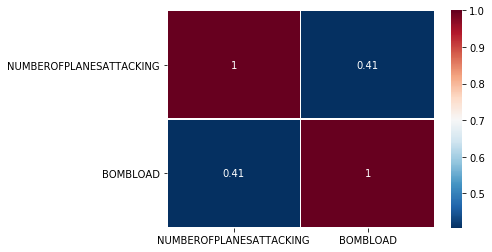

In [0]:
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

The results of the correlation were only 0.41. we cannot conclude that they have any impact or correlation with each other, since the result of the pearson correlation test is low.

to get some persepctive we will do a pearson correlation on the entire dataset

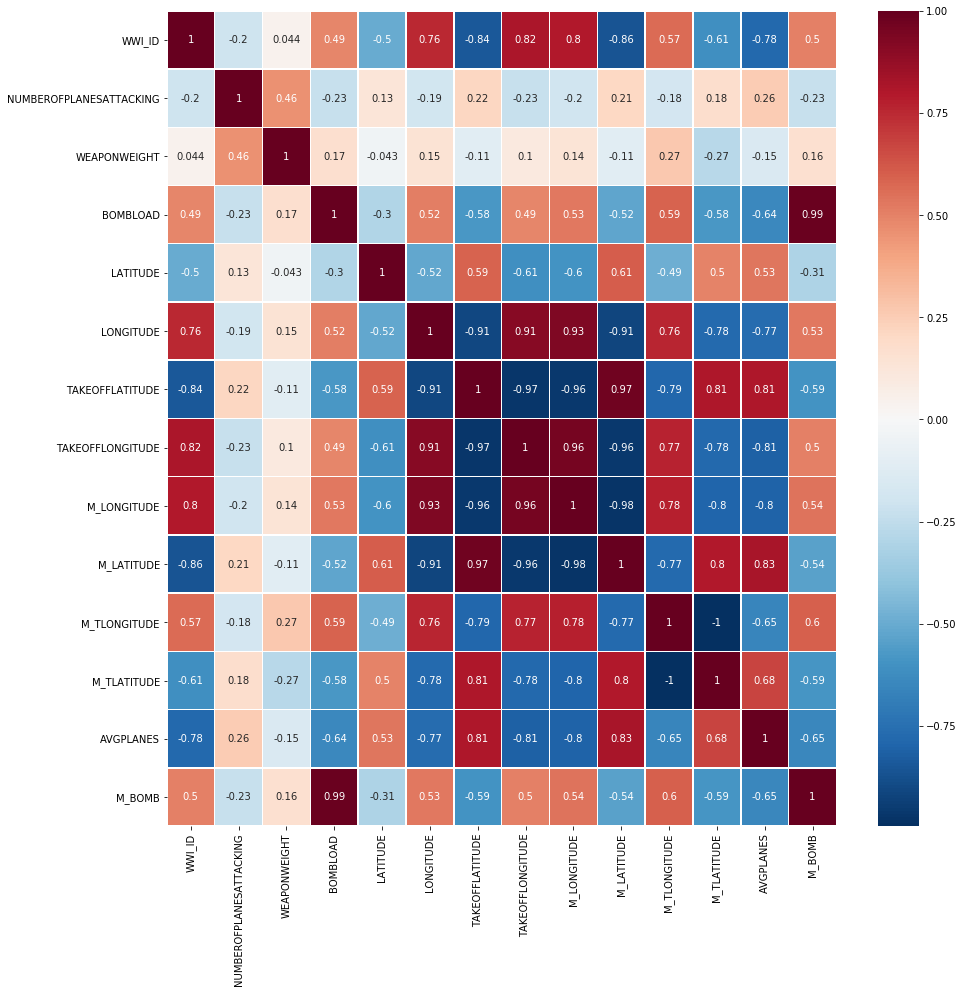

In [0]:
pearson_entire = df.corr(method='pearson')
plt.figure(figsize=(15,15))
sb.heatmap(pearson_entire, xticklabels=pearson_entire.columns, yticklabels=pearson_entire.columns, cmap='RdBu_r', annot=True,linewidth=0.5)

#Conclusion and Analysis

recall the questions asked during analysis:

What place had the highest number of planes and bombs attack during WWI by allied forces? Is there a significant correlation between the number of attacking planes and the bombload?

based on our cleaning of the data and analysis we can conclude that the most impacted countries were Germany, Italy and France.

we further concluded that the Number of Planes Attacking and Bombload had no correlation to each other and did not impact the data analysis.

However, the data did have a lot of missing data and missing operations. Upon my research I discovered that there were several bombing operations that were critical to WWI that were not inlcuded in this dataset. I checked that they were not dropped by accident, and they were not. They dataset had missing operations and is incomplete.

furthermore, there were serveral columns that were useless because they had more than 80% null or Nan values. Those columns were dropped. 

To clean the data further, I imputed the longitude and latitude values based on the country values and took the median longitude and latitude. It seemed to have put them in generally the correct location based on the map above in the analysis. 

I also imputed the Number of Planes attacking by imputing the median values by grouping the number of planes by the type of aircraft and then imputing the median number of attacking planes.

A similar approach was taken to impute the bombload on each operation. I grouped the data by the type of plane (MDS) and number of attacking planes, then took the median values and imputed the missing bombloads.

in conclusion, after cleaning the data most impacted countries were Germany, Italy and France.

we further concluded that the Number of Planes Attacking and Bombload had no correlation to each other and did not impact the data analysis.

I chose the dataset because I am interested in history, especially when it pertains to war and the question I chose interests me because I do not know a lot about WWI and wanted to know how it impacted the countries in Europe. 